<h1> Lecture 15 

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
<li>Hypothesis Testing and $p$-values   </li><br>
            
<li>Making Decisions with Incomplete Information  </li><br>

<li>Error Probabilities  </li><br>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
from IPython.display import Image

## The GSI's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


<h3> Headcounts of each of the twelve sections</h3>

In [3]:
# Recall that if we don't pass to the group method anything other than the 
# column label, it will simply return headcounts for each category.
# Here the categories are the section numbers. 
section_headcounts = scores.group('Section')
section_headcounts.show()

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


<h3>Compute the average score for each section</h3>

In [4]:
# Pass on the function np.average as a second argument, and 
# the group method will return the average score for each section.
section_averages = scores.group('Section', np.average)
section_averages.show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


<h4>Section 3's Midterm Average</h4>

This is our observed test statistic.

In [5]:
observed_average = section_averages.column('Midterm average').item(2) 
observed_average

13.666666666666666

<h4>Section 3's Population (Head Count)</h4>

This is our sample size. 

In [6]:
sample_size = section_headcounts.column('count').item(2)
sample_size

27

In [7]:
# In our random selection, we do NOT want to select the same student 
# more than once.  So, we must sample withOUT replacement.
random_sample = scores.sample(sample_size, with_replacement=False)
random_sample

Section,Midterm
10,14
4,10
2,11
11,19
1,21
5,20
2,14
7,10
3,0
3,16


<h4>Random Sample's Average Score: <br>
    
This is our Simulated Test Statistic</h3>

In [9]:
random_sample_average_score = np.average(random_sample.column('Midterm'))
random_sample_average_score
# If you wish to round, uncomment the line below
#np.round(random_sample_average_score,2)

14.481481481481481

<h4>Compare with the observed statistic&mdash;average of scores in Sec. 3</h4>

In [10]:
observed_average
# If you wish to round, uncomment the line below
#np.round(observed_average,2)

13.666666666666666

<h4>Doesn't look very far, but we still don't know what "far" means here.</h4>

<h3>Define a function that does the following:</h3><br>

<h4>Creates a random sample of size <tt>sample_size</tt> from the roster,  <br>

and computes a section average score.<br>

Each run of this function constitutes one "trial."</h4>

In [11]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg(sample_size):
    random_sample = scores.sample(sample_size, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

<h4>Let's run the cell a few times to check if it's generating varying numbers.</h4>

In [12]:
random_sample_midterm_avg(sample_size)

16.666666666666668

<h3>The next cell runs the "trial" many, many times&mdash;in fact, <tt>num_simulations</tt> times.</h3>

In [13]:
# Simulate 50,000 copies of the test statistic

num_simulations= 50000

# Create an empty array that will ultimately contain 
# the sample average for each of the trials.
sample_averages = make_array()

for i in np.arange(num_simulations):
    new_sample_average=random_sample_midterm_avg(sample_size)
    sample_averages = np.append(sample_averages, new_sample_average)    

<h3> Our Decision: </h3>

<h3>Compare the simulated distribution of the statistic and the actual, observed statistic </h3>

<h4>Create a table containing the sample averages.</h4>

In [14]:
averages_table = Table().with_column('Random Sample Average', sample_averages)
averages_table

<h4>Plot a histogram of the sample averages<br>

    
</h4>

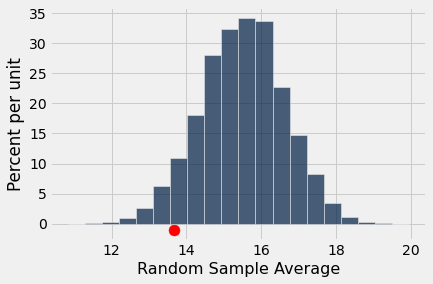

In [15]:
averages_table.hist(bins = 20)
# Plot a red dot of size 120, at vertical coordinate -0.01, 
# which is just under the horizontal axis
plots.scatter(observed_average, -0.01, color='red', s=120);

<h3>Question: Does Sec. 3's average (red dot) seem very different from the rest of the sections?</h3>

<h4> How many of our sample averages (simulated) are less than, or equal to, the observed average? </h4>

In [17]:
sample_averages <= observed_average

array([False, False, False, ..., False, False, False])

In [18]:
tail_head_count = np.count_nonzero(sample_averages <= observed_average)
tail_head_count

2869

<h4>The tail probability is the ratio of the tail head count over <tt>num_simulations</tt>, the total number of samples (trials).<br><br> 

The tail probability is also called the $p$-value.<br><br> 
    It's the probability of obtaining results <u>at least as extreme</u> as the observed value.</h4>

In [19]:
# (1) Calculate the p-value: simulation area beyond observed value
tail_probability = tail_head_count/num_simulations
tail_probability

0.05738

<h3>This is NOT less than 5%.  So, the GSI's assertion is supported by the data.</h3>

In [20]:
# (1) Calculate the p-value: simulation area beyond observed value
np.count_nonzero(sample_averages <= observed_average) / num_simulations
# (2) See if this is less than 5%

0.05738

<h3>Where is the 5% cutoff?</h3>

In [21]:
# Recall the Averages Table
averages_table

Random Sample Average
15.7407
17.1111
14.6296
14.1852
16.4815
13.7778
15.4815
16.1111
16.8519
15


<h4>Sort the table from low to high values:</h4>

In [22]:
sorted_averages_table = averages_table.sort(0)
sorted_averages_table

Random Sample Average
10.8148
10.8889
11.0741
11.1111
11.1852
11.1852
11.2963
11.2963
11.3333
11.3704


<h4>Grab the boundary value <u>beyond</u> which the tail probability $<$ 0.05 (5%):</h4>

In [23]:
# (1) Find simulated value corresponding to 5% of 50,000 = 2500
five_percent_point = sorted_averages_table.column(0).item(2500)
five_percent_point

13.592592592592593

If Sec. 3's average score (i.e., observed value) had been lower than the 5%-point above, it would have contradicted the GSI's claim.

In [24]:
# (2) See if this value is greater than observed value
observed_average

13.666666666666666

<h2>It was close, but the GSI Wins by scraping by!<br><br>
I still would NOT want to be in that GSI's section!</h2>

### Visual Representation

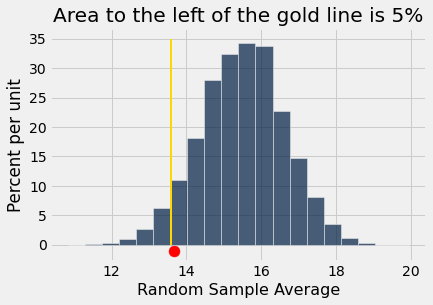

In [25]:
averages_table.hist(bins = 20)
# Plot a gold-colored vertical line, of thickness 2, 
# at horizontal coordinate equal to the 
# five_percent_point (which is 13.63), 
# from vertical coordinate 0 to 35 (%/unit) (0 to 0.35)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)

# Give the plot a title
plots.title('Area to the left of the gold line is 5%');

# Plot a red dot of size 120, at vertical coordinate -0.01, 
# which is just under the horizontal axis
plots.scatter(observed_average, -0.01, color='red', s=120);

<h3>QUESTION: Did Sec. 3's average score fall in the 5% tail?</h3>